In [2]:
# pip install -U albumentations
# ! pip install opencv-python
import numpy as np
import glob
import cv2 as cv
import albumentations as A


In [49]:

import random
transform = A.Compose([
    A.CLAHE(p=0.3),
    # A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.1, rotate_limit=60, p=.75),
    # A.Rotate()
    A.Blur(blur_limit=3),
    # A.OpticalDistortion(),
    # A.GridDistortion(),
    # A.HueSaturationValue(),
    # A.VerticalFlip(p=0.5),
    # A.HorizontalFlip(p=0.5)
])
# random.seed(42)
counter = 0



In [90]:
data = []
for i in glob.glob('./no/*'):
    img = cv.imread(i)
    img = cv.cvtColor(img , cv.COLOR_BGR2RGB)
    img = cv.resize(img, (224, 224))
    for j in range(10):    
        augmented_image = transform(image=img)['image']
        data.append([augmented_image, 0])
        counter +=1
    data.append([img, 0])
    
    print(i)

for i in glob.glob('./yes/*'):
    img = cv.imread(i)
    img = cv.cvtColor(img , cv.COLOR_BGR2RGB)
    img = cv.resize(img, (224, 224))
    for j in range(10):    
        augmented_image = transform(image=img)['image']
        data.append([augmented_image, 1])
        counter +=1
    data.append([img, 1])
    print(i)


./no/39 no.jpg
./no/44no.jpg
./no/no 89.jpg
./no/47 no.jpg
./no/23 no.jpg
./no/38 no.jpg
./no/N16.jpg
./no/41 no.jpg
./no/40 no.jpg
./no/17 no.jpg
./no/no 1.jpg
./no/no 94.jpg
./no/14 no.jpg
./no/30 no.jpg
./no/N17.jpg
./no/no 92.jpg
./no/12 no.jpg
./no/no 7.jpeg
./no/no 5.jpeg
./no/28 no.jpg
./no/no 923.jpg
./no/50 no.jpg
./no/No16.jpg
./no/29 no.jpg
./no/N1.JPG
./no/27 no.jpg
./no/45 no.jpg
./no/37 no.jpg
./no/35 no.jpg
./no/46 no.jpg
./no/5 no.jpg
./no/13 no.jpg
./no/N2.JPG
./no/no 9.png
./no/No14.jpg
./no/no 97.jpg
./no/22 no.jpg
./no/36 no.jpg
./no/20 no.jpg
./no/No22.jpg
./no/no 8.jpg
./no/N3.jpg
./no/N6.jpg
./no/11 no.jpg
./no/no 96.jpg
./no/48 no.jpeg
./no/No20.jpg
./no/8 no.jpg
./no/no 98.jpg
./no/No17.jpg
./no/N21.jpg
./no/No12.jpg
./no/No18.jpg
./no/33 no.jpg
./no/no 6.jpg
./no/6 no.jpg
./no/32 no.jpg
./no/no 10.jpg
./no/49 no.jpg
./no/9 no.jpg
./no/No15.jpg
./no/18 no.jpg
./no/1 no.jpeg
./no/42 no.jpg
./no/26 no.jpg
./no/43 no.jpg
./no/7 no.jpg
./no/N19.JPG
./no/31 no.jpg
.

In [91]:
import random 
random.shuffle(data)
for i in range(10):
    print(data[i][1], end=' ')

1 1 0 1 1 0 1 1 1 1 

In [92]:
import matplotlib.pyplot as plt


1


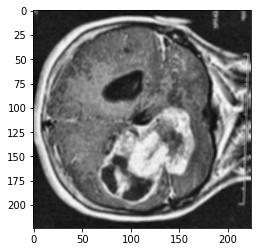

In [93]:
plt.imshow(data[-1][0])
print(data[-1][1])

In [94]:
len(data)
data = np.array(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [95]:
print(data.shape)
x_train = []
y_train = []
x_test = []
y_test = []



(2783, 2)


In [96]:
for i in data[:2200, 0]:
    x_train.append(i)
for i in data[:2200, 1]:
    y_train.append(i)
for i in data[2200:, 0]:
    x_test.append(i)
for i in data[2200:, 1]:
    y_test.append(i)


In [97]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train.shape

(2200, 224, 224, 3)

In [99]:
np.save('./brain_aug.npy', [(x_train,y_train), (x_test,y_test)])

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [100]:
! cp ./brain_aug.npy /content/drive/MyDrive/Colab_Notebooks/brain

In [101]:
data.shape

(2783, 2)